In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [143]:
df1 = pd.read_csv('calories.csv')
df2 = pd.read_csv('exercise.csv')

In [144]:
df1.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [145]:
df2.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [146]:
df1.shape

(15000, 2)

In [147]:
df2.shape

(15000, 8)

In [148]:
df = pd.merge(df2, df1, how='inner', on='User_ID')

In [149]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [150]:
df.shape

(15000, 9)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [152]:
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [153]:
df.duplicated().sum()

0

In [154]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<h2>Explorartory Data Analysis<h2>

<h4>1. Univariate Analysis on Categorical Column<h4>

**1.1. Gender**

Gender
female    7553
male      7447
Name: count, dtype: int64

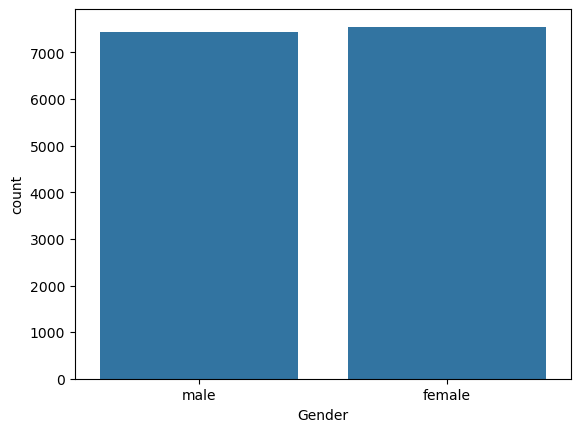

In [155]:
sns.countplot(df, x = 'Gender')
df['Gender'].value_counts()

In [156]:
px.pie(df, names=df['Gender'])

- **Observations**
    - There are 50.4% of females and 49.6% of males.
    - The data consists of an almost equal number of males and females, which will give us balanced results.

<h4>2. Univariate Analysis on Numerical Column<h4>

**2.1 Age**

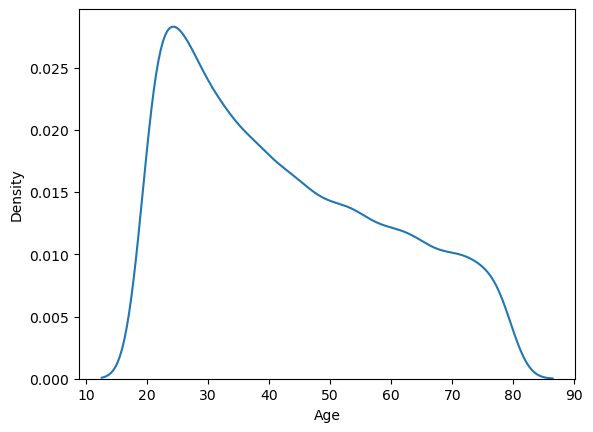

In [157]:
sns.kdeplot(df, x = 'Age')
plt.show()

In [158]:
len(df[df['Age'] < 30]) / len(df['Age']) * 100 

29.246666666666666

In [159]:
px.box(df, x = 'Age')

In [160]:
df['Age'].skew()

0.47338270096138746

- **Observations**
    - 30% of the data lies in the range where age is between 20 and 30.
    - No outliers.
    - The data is moderately skewed, and hence we can transform the 'Age' column to achieve better results.
    - The distribution is somewhat **uniform**, with the highest peak between the ages of 20 and 30.

**2.2. Height** 

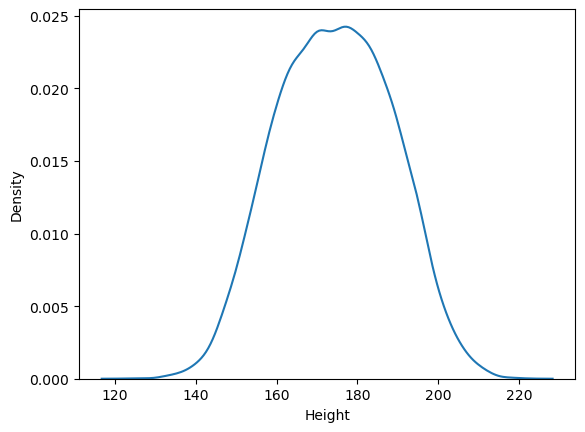

In [161]:
sns.kdeplot(df, x = 'Height');

In [162]:
df['Height'].skew()

-0.006189620437893538

In [163]:
px.box(df, x = 'Height')

- **Observations**
    - The 'Height' column follows a **normal distribution**.
    - Presence of only a few outliers.
    - The skewness is almost 0, so transformation will not be needed.

**2.3 Weight**

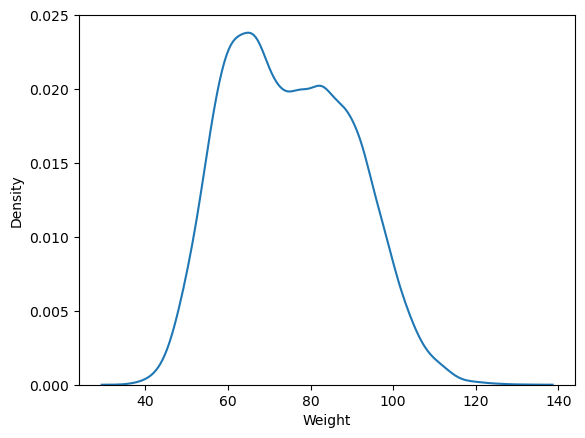

In [164]:
sns.kdeplot(df, x = 'Weight');

In [165]:
df['Weight'].skew()

0.22672530725814513

In [166]:
px.box(df, x = 'Weight')

- **Observations**
    - The 'Weight' column follows a distribution that is close to a **normal distribution**.
    - The 'Weight' column has a skewness of 0.226, indicating that the distribution is close to a normal distribution. Transformations can be applied to reduce the skewness and bring it closer to zero.
    - There are only a few outliers present. 

**2.4 Duration**

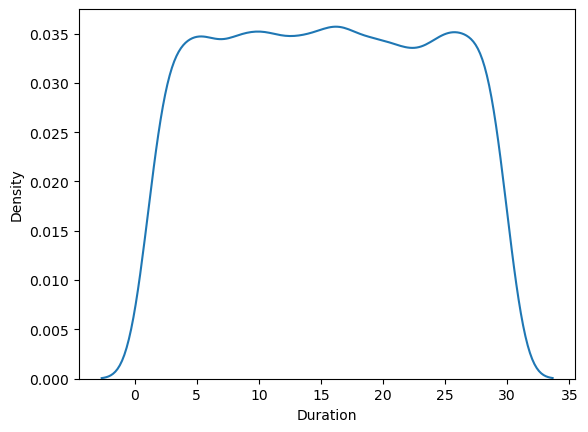

In [167]:
sns.kdeplot(df, x = 'Duration');

In [168]:
df['Duration'].skew()

0.0047505366680978415

In [169]:
px.box(df, x = 'Duration')

- **Observation**
    - The 'Duartion' column follows a **uniform distribution**.
    - The skewness is close to 0, so there is no need for transformation. 
    - No outliers present.

**2.5 Heart_Rate**

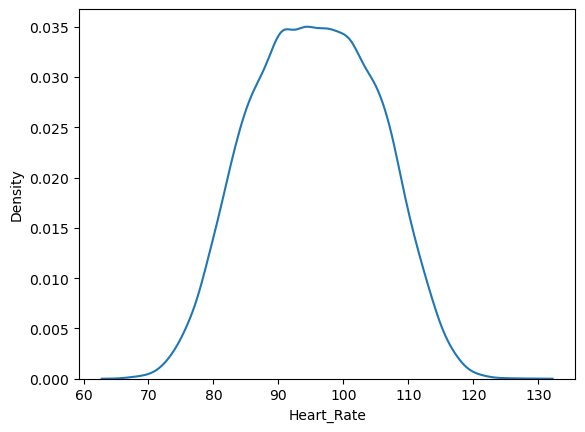

In [170]:
sns.kdeplot(df, x = 'Heart_Rate');

In [171]:
df['Heart_Rate'].skew()

-0.01070407972854895

In [172]:
px.box(df, x = 'Heart_Rate')

- **Observations**
    - The 'Heart_Rate' column follows a normal distribution, as indicated by the skewness value of -0.01.
    - There is only a single outlier present.

**2.6 Body_Temp**

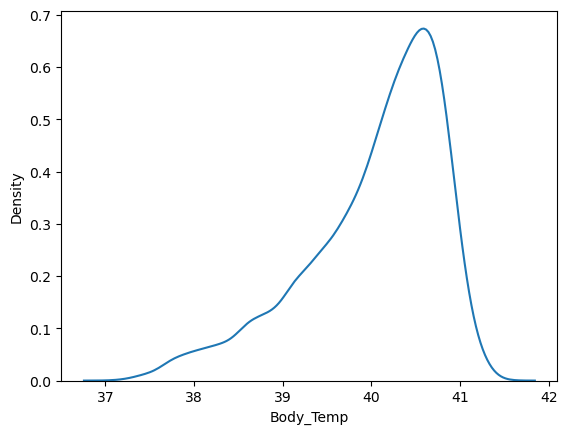

In [173]:
sns.kdeplot(df, x= 'Body_Temp');

In [174]:
df['Body_Temp'].skew()

-0.9943824155974582

In [175]:
px.box(df, x = 'Body_Temp')

- **Observations**
    - The 'Body_Temp' column is slightly left-skewed and peaks between 40 and 41 degrees Celsius. This is quite normal, as body temperature rises above the usual 37 degrees Celsius when we exercise.
    - There are a few outliers present.
    - The skewness of the distribution is -0.99, which indicates that the distribution is close to normal.

**2.7 Calories**

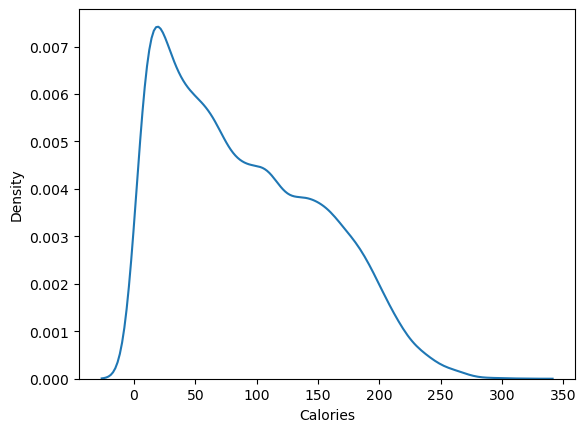

In [176]:
sns.kdeplot(df, x = 'Calories');

In [177]:
df['Calories'].skew()

0.5053713740451047

In [178]:
px.box(df, x = 'Calories')

- **Observations**
    - The 'Calories' column is moderately right-skewed, with a peak between 0 and 60 calories burned. This suggests that the intensity or duration of exercise is low, resulting in a lower number of calories burned.
    - The 'Calories' column is moderately right-skewed but still approximately follows a **normal distribution**.
    - There are a few outlier present. 

**3. Bivariate Analysis and Multivariate Analysis**

**3.1. Gender vs Calories**

Average calories burnt by males ->  90.94574996642943
Average calories burnt by males ->  88.1530517675096


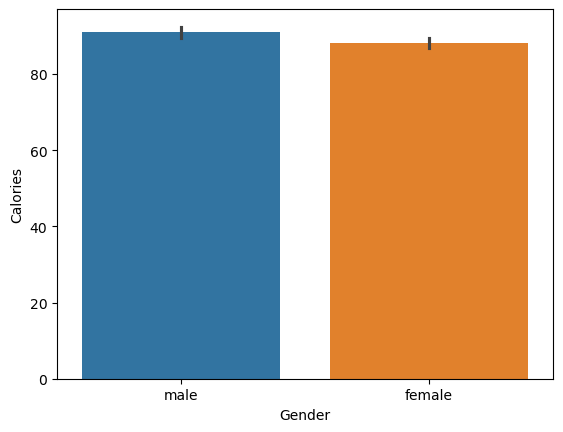

In [179]:
sns.barplot(df, x = 'Gender', y = 'Calories', hue = 'Gender')
print('Average calories burnt by males -> ', df['Calories'][df['Gender'] == 'male'].mean())
print('Average calories burnt by males -> ', df['Calories'][df['Gender'] == 'female'].mean())

- **Observations**
    - The average calories burned by males and females are almost identical, indicating that the intensity or duration of exercise is similar for both genders.


**3.2 Age vs Calories vs Gender**

In [180]:
px.scatter(df, x = 'Calories', y = 'Age', color='Gender')

- **Observations**
    - The above plot shows that individuals across the entire age range, from 20 to 80, are burning calories through exercise.
    - It doesn't matter what the age is; both males and females are exercising and burning calories.
    - There is a concentrated cluster between the ages of 20 and 40, which is quite normal as most individuals in this age range exercise.

**3.2 Height vs Calories vs Gender**

In [181]:
px.scatter(df, x = 'Height', y = 'Calories', color = 'Gender')

- **Observations**
    - The plot shows that the majority of males are taller than females.
    - There is also a relationship indicating that some individuals, mainly males, who are taller are burning slightly more calories.

**3.3 Duration vs Calories vs Age**

In [182]:
px.scatter(df, x = 'Duration', y = 'Calories', color = 'Gender')

In [183]:
px.scatter_3d(df, x = 'Age', y = 'Duration', z = 'Calories', color = 'Gender')

- **Observations**
    - Calories burned and the duration of exercise show a linear relationship.
    - Both males and females have similar exercise durations, but males burn more calories, likely due to the higher intensity of their workouts.
    - Some points for males show high exercise duration but low calories burned, which likely refers to older individuals who may exercise with lower intensity.

**3.4 Heart_Rate vs Calories vs Gender**

In [184]:
px.scatter(df, x = 'Heart_Rate', y = 'Calories', color='Gender')

- **Observations**
    - The heart rate and the calories burned show a linear relationship.
    - "Between heart rates of 100 and 110, the number of males and females is similar, but males burn more calories, likely due to the higher intensity of their exercise.


**3.5 Heart_Rate vs Calories vs Age**

In [185]:
px.scatter(df, x = 'Heart_Rate', y = 'Calories', color='Age')

- **Observations**
    - Between heart rates of 100 and 110, older individuals burn more calories, which is an unusual trend.

**3.6 Body_Temp vs Calories vs Gender**

In [186]:
px.scatter(df, x = 'Body_Temp', y = 'Calories', color='Gender')

- **Observations**
    - Body temperature and calories burned show a linear relationship.

**3.7 Body_Temp vs Calories vs Age**

In [187]:
px.scatter(df, x = 'Body_Temp', y = 'Calories', color='Age')

- **Observation**
    - Body temperature shows a similar trend across age groups.

<h3>Model Training<h3>

In [188]:
X = df.drop(['Calories', 'User_ID'], axis=1)
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [189]:
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype='int64')

X_train['Gender'] = ohe.fit_transform(X_train[['Gender']])
X_test['Gender'] = ohe.transform(X_test[['Gender']])

In [190]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'R2 Score : {r2_score(y_test,y_pred)}')
    print(f'Predictions are: {y_pred}')

    sns.kdeplot(y_test-y_pred)

R2 Score : 0.9594609583735635
Predictions are: [102.28274729  11.39783034  37.087494   ... 184.58186952  33.21876575
  98.27693135]


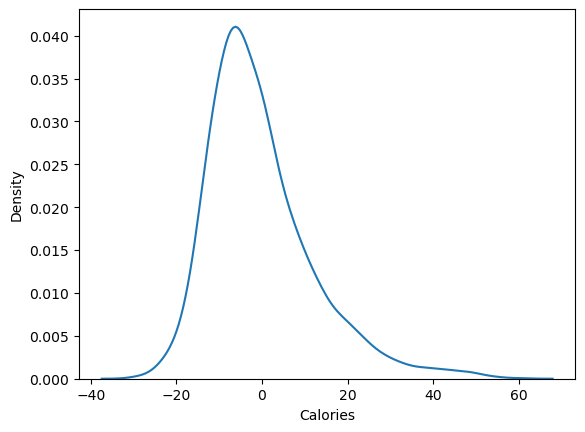

In [191]:
predict(ElasticNet())

R2 Score : 0.9400049376245246
Predictions are: [ 98.50189658  21.69902237  38.82074751 ... 163.85291047  39.34351567
  92.00850397]


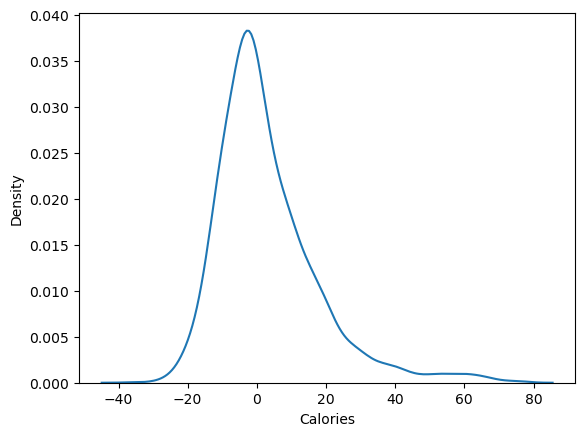

In [192]:
predict(SVR())

R2 Score : 0.9979179918024693
Predictions are: [ 99.79  14.11  28.26 ... 182.38  28.39  94.7 ]


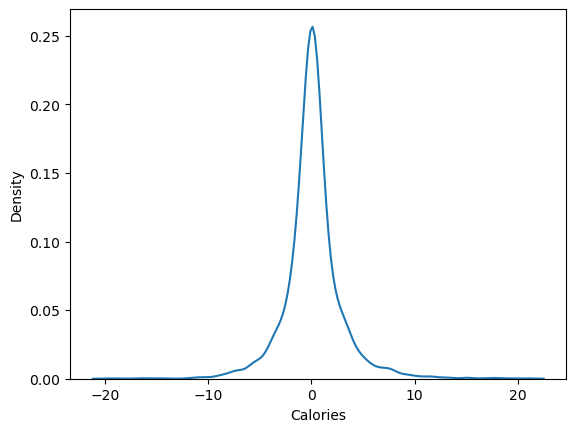

In [193]:
predict(RandomForestRegressor())

R2 Score : 0.9863115931596533
Predictions are: [ 95.4  11.8  30.2 ... 172.   27.2  95.8]


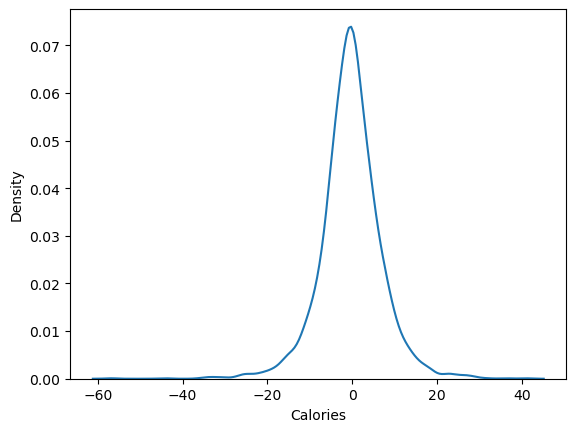

In [194]:
predict(KNeighborsRegressor())

R2 Score : 0.9962406142578755
Predictions are: [ 96.39506045  12.09002625  27.71278626 ... 183.98879768  27.95991531
  87.42854596]


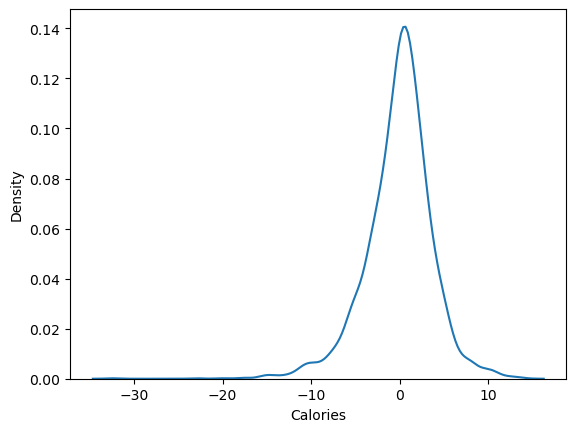

In [195]:
predict(GradientBoostingRegressor())

R2 Score : 0.998757171311305
Predictions are: [ 98.68716   13.302052  28.12299  ... 182.96077   29.275991  96.143005]


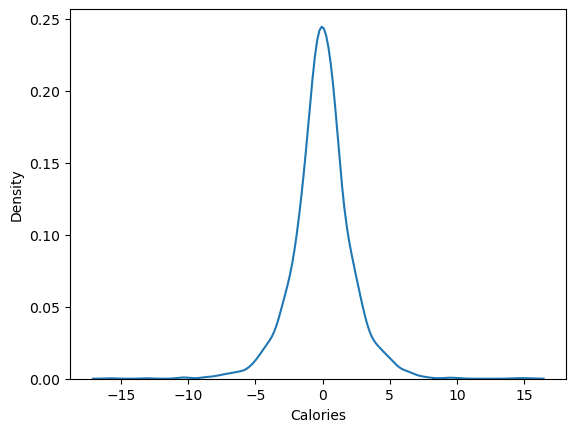

In [196]:
predict(XGBRegressor())